In [1]:
import sys
import os

print(sys.executable)

/Users/mimuw2022/my_new_env/bin/python


In [2]:
%cd .

/Users/mimuw2022/Documents/GitHub/MSTP-using-pandas


/Users/mimuw2022/my_new_env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pandas as pd
import numpy as np
import networkx as nx

pd.set_option('display.max_columns', None)

In [4]:
from SocialNetworkGenerator import SocialNetworkAnalyzer
from utils import *
from configuration import *
from model_utils import *
from model_dynamics import *
from Simulator import *

In [5]:
df = pd.read_pickle("small.pkl")


In [6]:
df

,neighbors,Unnamed: 0,adults,egg,bread,rice,vegetables without dried,Dried vegetables,fish and seafood,milk without cheese,Cheese,Beef and veal aggregated,Pork aggregated,Lamb and goat aggregated,Poultry aggregated,egg protein,bread protein,rice protein,vegetables without dried protein,Dried vegetables protein,fish and seafood protein,milk without cheese protein,Cheese protein,Beef and veal aggregated protein,Pork aggregated protein,Lamb and goat aggregated protein,Poultry aggregated protein,egg protein share,bread protein share,rice protein share,vegetables without dried protein share,Dried vegetables protein share,fish and seafood protein share,milk without cheese protein share,Cheese protein share,Beef and veal aggregated protein share,Pork aggregated protein share,Lamb and goat aggregated protein share,Poultry aggregated protein share,total protein content,HC24,HA09,cult,cult1,income,Package holidays,redmeat,fuel,pet,egg price,bread price,rice price,vegetables without dried price,Dried vegetables price,fish and seafood price,milk without cheese price,Cheese price,Beef and veal aggregated price,Pork aggregated price,Lamb and goat aggregated price,Poultry aggregated price,egg_total_spending,bread_total_spending,rice_total_spending,vegetables without dried_total_spending,Dried vegetables_total_spending,fish and seafood_total_spending,milk without cheese_total_spending,Cheese_total_spending,Beef and veal aggregated_total_spending,Pork aggregated_total_spending,Lamb and goat aggregated_total_spending,Poultry aggregated_total_spending,egg_emission,bread_emission,rice_emission,vegetables without dried_emission,Dried vegetables_emission,fish and seafood_emission,milk without cheese_emission,Cheese_emission,Beef and veal aggregated_emission,Pork aggregated_emission,Lamb and goat aggregated_emission,Poultry aggregated_emission,total spending on food,total emission from food,sum of protein share (check),denormalized total emission from food,kmeans_cluster,consumption_rate,dur_spend_r,ndur_spend_r,serv_spend_r,meat_protein_share,meat_tertile,occupation,culture,total_meat_protein_share
node_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"[8, 1, 41, 66, 23, 59, 97, 71, 43, 91, 12, 11,...",56078,4,0.000000,25.000000,1.303001,81.150000,4.590000,0.000000,51.700000,7.600000,10.087250,30.587144,0.000000,36.525606,0.000000,2212.500000,35.050721,2028.750000,998.325,0.000000,1809.500000,1710.000000,2017.449947,4893.943098,0.000000,6391.981033,0.000000,0.100124,0.001586,0.091809,0.045178,0.000000,0.081887,0.077384,0.091298,0.221470,0.000000,0.289263,22097.499799,Z1,2,0,49.000000,19489.375000,310.0,459.287406,0.00,0.00,5.598756,16.945000,14.255556,6.200863,5.0,17.124365,2.941006,10.611842,9.185616,11.986402,13.310345,13.655834,0.00,423.625000,18.575000,503.20,22.950000,0.000000,152.050000,80.650000,92.657601,366.629804,0.000,498.787594,0.000000,39.250000,5.798353,162.300000,8.216100,0.000000,103.400000,139.080000,357.088641,308.930158,0.000000,226.458757,2159.125000,1350.522009,1.0,5402.088035,2,0.804656,0.562477,0.188898,0.078087,0.602031,3,Z1,0,0.602031
1,"[0, 8, 12, 41, 5, 11, 23, 27, 36, 43, 71, 96, ...",12608,2,9.823611,46.207321,0.000000,55.835004,0.950000,13.731896,67.560501,7.509609,3.588398,5.999066,0.000000,0.000000,1080.597222,4089.347877,0.000000,1395.875094,206.625,3158.336001,2364.617519,1689.661994,717.679511,959.850557,0.000000,0.000000,0.068992,0.261090,0.000000,0.089122,0.013192,0.201648,0.150972,0.107879,0.045821,0.061283,0.000000,0.000000,15662.590777,Z1,1,0,48.950000,27718.550000,4500.0,106.550000,1572.55,0.00,5.598756,6.643969,2.381323,3.623175,5.0,17.124365,2.380829,9.720879,11.865592,10.663583,13.310345,11.346558,55.00,307.000000,0.000000,202.30,4.750000,235.150000,160.850000,73.000000,42.578460,63.971540,0.000,0.000000,45.876264,72.545493,0.000000,111.670008,1.700500,145.558094,135.121001,137.425842,127.029274,60.590566,0.000000,0.000000,1144.600000,837.517042,1.0,1

In [7]:
df_org = df.copy()

In [8]:
df = df_org.copy()
res_lm, df_lm = run_simulation(df, pro_share_list, 0.3, 5.0, 0.5, 0.005, static_node_indices=[], linear_model_bool=True, confidence_col= None, confidence_param=None)

Processing: alpha_0=0.5, alpha=0.3, beta=5.0, sit=0.005, x=0
after 50 update 0 static agents


In [9]:
df_lm[pro_share_list].describe()

,egg protein share,bread protein share,rice protein share,vegetables without dried protein share,Dried vegetables protein share,fish and seafood protein share,milk without cheese protein share,Cheese protein share,Beef and veal aggregated protein share,Pork aggregated protein share,Lamb and goat aggregated protein share,Poultry aggregated protein share
count,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000
mean,0.047647,1.255407e-01,0.006426,0.089111,0.071015,0.049884,0.097397,0.159122,0.095548,0.129230,8.852135e-03,0.120227
std,0.033744,6.203146e-02,0.012233,0.044283,0.064377,0.054317,0.066296,0.082375,0.089799,0.114538,2.136265e-02,0.106627
min,0.000000,9.378962e-07,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.022329,8.327283e-02,0.000223,0.057842,0.019286,0.009687,0.052395,0.104028,0.027064,0.037031,7.342723e-08,0.036555
50%,0.042727,1.162388e-01,0.002849,0.083561,0.056088,0.035187,0.082844,0.146589,0.074548,0.099027,6.360621e-04,0.089893
75%,0.068364,1.543031e-01,0.007711,0.115312,0.102538,0.071192,0.124989,0.204300,0.135628,0.191956,8.175260e-03,0.175396
max,0.261634,5.364620e-01,0.235370,0.310849,0.362747,0.366086,0.594462,0.716937,0.591319,0.766769,2.309203e-01,0.597216


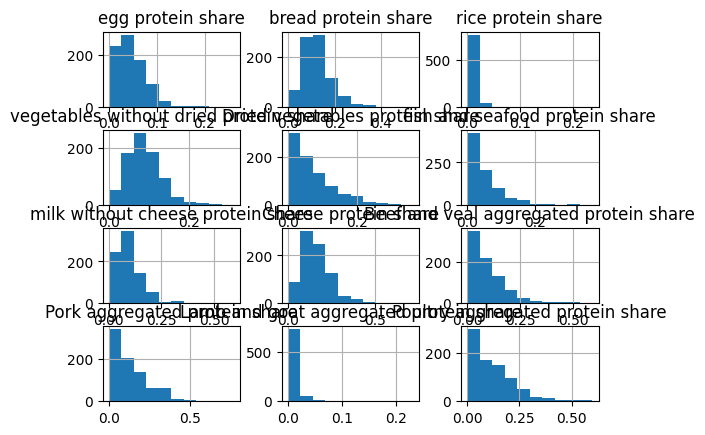

In [10]:
df_lm[pro_share_list].hist()
plt.show()

In [11]:
pd.DataFrame([res_lm])

,alpha_0,alpha,beta,sit,x,dynamic_initial_total_emission_from_food_mean,dynamic_initial_total_emission_from_food_var,dynamic_initial_total_emission_from_food_total,dynamic_initial_total_emission_from_food_count,dynamic_initial_denormalized_total_emission_from_food_mean,dynamic_initial_denormalized_total_emission_from_food_var,dynamic_initial_denormalized_total_emission_from_food_total,dynamic_initial_denormalized_total_emission_from_food_count,dynamic_initial_total_spending_on_food_mean,dynamic_initial_total_spending_on_food_var,dynamic_initial_total_spending_on_food_total,dynamic_initial_total_spending_on_food_count,dynamic_initial_redmeat_mean,dynamic_initial_redmeat_var,dynamic_initial_redmeat_total,dynamic_initial_redmeat_count,dynamic_initial_redmeat_protein_share_mean,dynamic_initial_redmeat_protein_share_var,dynamic_initial_redmeat_protein_share_total,dynamic_initial_redmeat_protein_share_count,dynamic_initial_egg_protein_share_mean,dynamic_initial_egg_protein_share_var,dynamic_initial_egg_protein_share_total,dynamic_initial_egg_protein_share_count,dynamic_initial_bread_protein_share_mean,dynamic_initial_bread_protein_share_var,dynamic_initial_bread_protein_share_total,dynamic_initial_bread_protein_share_count,dynamic_initial_rice_protein_share_mean,dynamic_initial_rice_protein_share_var,dynamic_initial_rice_protein_share_total,dynamic_initial_rice_protein_share_count,dynamic_initial_vegetables_without_dried_protein_share_mean,dynamic_initial_vegetables_without_dried_protein_share_var,dynamic_initial_vegetables_without_dried_protein_share_total,dynamic_initial_vegetables_without_dried_protein_share_count,dynamic_initial_Dried_vegetables_protein_share_mean,dynamic_initial_Dried_vegetables_protein_share_var,dynamic_initial_Dried_vegetables_protein_share_total,dynamic_initial_Dried_vegetables_protein_share_count,dynamic_initial_fish_and_seafood_protein_share_mean,dynamic_initial_fish_and_seafood_protein_share_var,dynamic_initial_fish_and_seafood_protein_share_total,dynamic_initial_fish_and_seafood_protein_share_count,dynamic_initial_milk_without_cheese_protein_share_mean,dynamic_initial_milk_without_cheese_protein_share_var,dynamic_initial_milk_without_cheese_protein_share_total,dynamic_initial_milk_without_cheese_protein_share_count,dynamic_initial_Cheese_protein_share_mean,dynamic_initial_Cheese_protein_share_var,dynamic_initial_Cheese_protein_share_total,dynamic_initial_Cheese_protein_share_count,dynamic_initial_Beef_and_veal_aggregated_protein_share_mean,dynamic_initial_Beef_and_veal_aggregated_protein_share_var,dynamic_initial_Beef_and_veal_aggregated_protein_share_total,dynamic_initial_Beef_and_veal_aggregated_protein_share_count,dynamic_initial_Pork_aggregated_protein_share_mean,dynamic_initial_Pork_aggregated_protein_share_var,dynamic_initial_Pork_aggregated_protein_share_total,dynamic_initial_Pork_aggregated_protein_share_count,dynamic_initial_Lamb_and_goat_aggregated_protein_share_mean,dynamic_initial_Lamb_and_goat_aggregated_protein_share_var,dynamic_initial_Lamb_and_goat_aggregated_protein_share_total,dynamic_initial_Lamb_and_goat_aggregated_protein_share_count,dynamic_initial_Poultry_aggregated_protein_share_mean,dynamic_initial_Poultry_aggregated_protein_share_var,dynamic_initial_Poultry_aggregated_protein_share_total,dynamic_initial_Poultry_aggregated_protein_share_count,static_initial_total_emission_from_food_mean,static_initial_total_emission_from_food_var,static_initial_total_emission_from_food_total,static_initial_total_emission_from_food_count,static_initial_denormalized_total_emission_from_food_mean,static_initial_denormalized_total_emission_from_food_var,static_initial_denormalized_total_emission_from_food_total,static_initial_denormalized_total_emission_from_food_count,static_initial_total_spending_on_food_mean,static_initial_total_spending_on_food_var,static_initial_total_spending_on_food_total,static_initial_total_spending_on_food_count,static_initial_redmeat_mean,static_initial_redmeat_var,static_